In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../readmaroc')

from maroc_data_new_tboard import MarocData

from functools import partial
from collections import Counter
from operator import add
from functools import reduce
from scipy.stats import norm

input_dat = '../data/Run000137944.dat'
marocdata = MarocData(input_dat)

y_offset = [12000, 10000, 8000, 4000, 2000]

In [2]:
marocdata.check_clean_ts()

Timestamps of board 27 have been fixed
Timestamps of board 28 have been fixed
Timestamps of board 29 have been fixed


In [3]:
marocdata.fix_p1(debug=False)

In [4]:
all_boards = np.arange(1, 31)
non_active = [b for b in all_boards if b not in marocdata.active_boards]
print("Boards {} not in this file".format(non_active))

Boards [17] not in this file


In [5]:
marocs = [(i, j) for i, j in zip(np.arange(0, 384, 64), np.arange(0, 384, 64)[1:])]


In [6]:
sigma=4
pedestals_tot = marocdata.pedestals_tot
noise_tot = marocdata.noise_tot(sigma)


In [7]:
from plot_run import board_plot, plot_event_ts_new, take_consecutive, over_threshold_per_board

In [8]:
ts_over_threshold = over_threshold_per_board(marocdata, pedestals_tot, noise_tot)

all_ts = reduce(add, ts_over_threshold.values())
no_hits = 3
ts_to_plot = [ts for ts, occ in Counter(all_ts).items() if occ >= no_hits]


Plotting TS: 2499876022


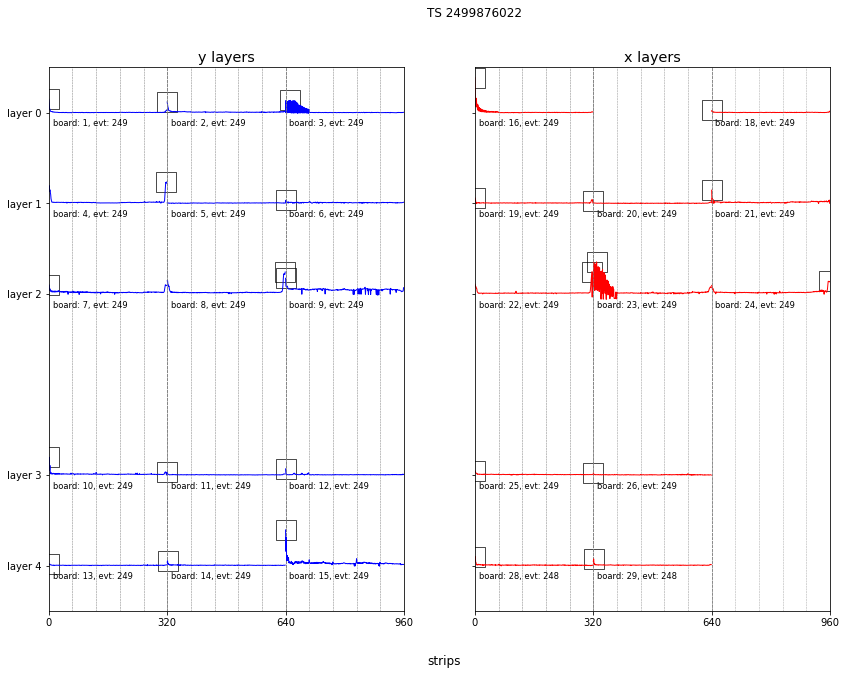

Plotting TS: 234036444


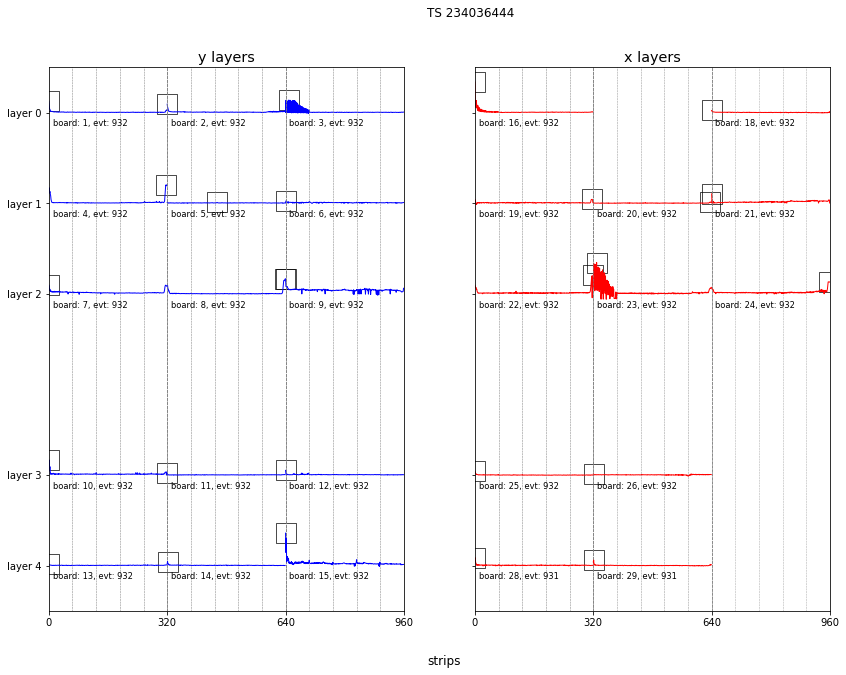

Plotting TS: 205670175


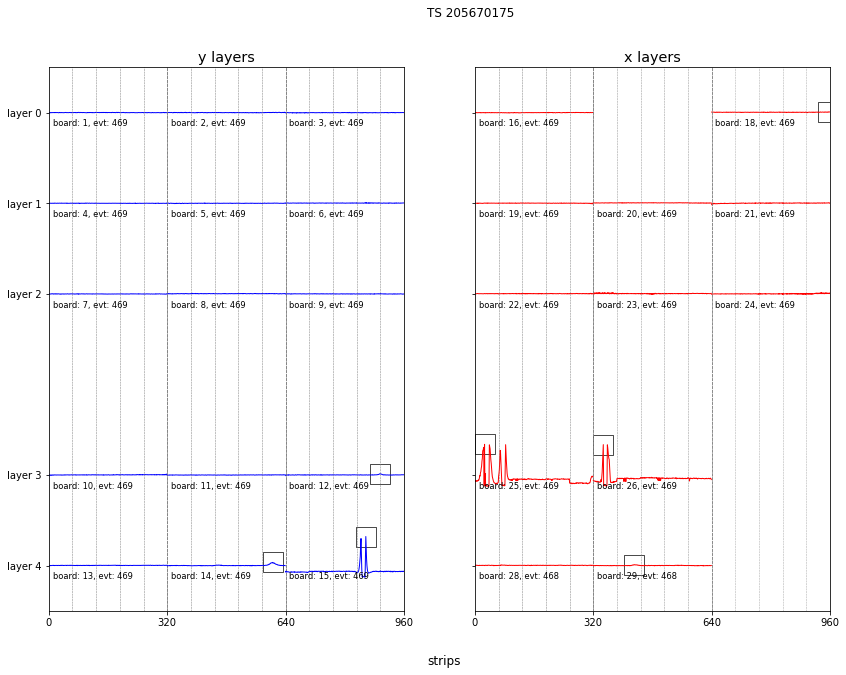

In [9]:
if len(ts_to_plot) > 0:
    for ts in ts_to_plot:
        fig, ax1, ax2 = plot_event_ts_new(ts, marocdata, pedestals_tot, noise_tot)
        plt.show()